In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("Boston_Data_Clean.csv", index_col=0, low_memory=False)
data

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


In [65]:
data = data.drop(['start_station_id'], axis=1)
data = data.drop(['end_station_id'], axis=1)
data = data.drop(['start_station_name'], axis=1)
data = data.drop(['end_station_name'], axis=1)
data = data.drop(['bike_id'], axis=1)
data = data.drop(['user_type'], axis=1)
data

,start_time,end_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49
1,2017-01-01 00:13:16,2017-01-01 00:28:07
2,2017-01-01 00:16:17,2017-01-01 00:44:10
3,2017-01-01 00:21:22,2017-01-01 00:33:50
4,2017-01-01 00:30:06,2017-01-01 00:40:28
...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12


In [66]:
data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce')
data['end_time'] = pd.to_datetime(data['end_time'], errors='coerce')

data['dayofweek_start'] = data.start_time.dt.dayofweek
data['dayofweek_end'] = data.end_time.dt.dayofweek

data['month_start'] = data.start_time.dt.month
data['month_end'] = data.end_time.dt.month

data['time_start'] = data.start_time.dt.time
data['time_end'] = data.end_time.dt.time

data['start_hour'] = data.start_time.dt.hour
data['duration'] = data.end_time - data.start_time

data['duration_minutes'] = data.duration.apply(
    lambda x: pd.Timedelta(x).total_seconds()/60
)
data

,start_time,end_time,dayofweek_start,dayofweek_end,month_start,month_end,time_start,time_end,start_hour,duration,duration_minutes
0,2017-01-01 00:06:58,2017-01-01 00:12:49,6,6,1,1,00:06:58,00:12:49,0,0 days 00:05:51,5.850000
1,2017-01-01 00:13:16,2017-01-01 00:28:07,6,6,1,1,00:13:16,00:28:07,0,0 days 00:14:51,14.850000
2,2017-01-01 00:16:17,2017-01-01 00:44:10,6,6,1,1,00:16:17,00:44:10,0,0 days 00:27:53,27.883333
3,2017-01-01 00:21:22,2017-01-01 00:33:50,6,6,1,1,00:21:22,00:33:50,0,0 days 00:12:28,12.466667
4,2017-01-01 00:30:06,2017-01-01 00:40:28,6,6,1,1,00:30:06,00:40:28,0,0 days 00:10:22,10.366667
...,...,...,...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,6,6,12,12,23:46:18,23:50:27,23,0 days 00:04:09,4.150000
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,4,4,12,12,16:11:56,16:16:18,16,0 days 00:04:22,4.366667
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,5,5,12,12,08:09:44,08:26:08,8,0 days 00:16:24,16.400000
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,5,5,12,12,12:20:01,12:49:12,12,0 days 00:29:11,29.183333


In [67]:
data_start_hours = data.drop(['dayofweek_start'], axis=1)
data_start_hours = data_start_hours.drop(['dayofweek_end'], axis=1)

In [68]:
mappingDay = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
data = data.replace({"dayofweek_start": mappingDay})
data = data.replace({"dayofweek_end": mappingDay})
day_order = ["Monday", "Thursday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

mapping_Month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
data = data.replace({"month_start": mapping_Month})
data = data.replace({"month_end": mapping_Month})
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data

,start_time,end_time,dayofweek_start,dayofweek_end,month_start,month_end,time_start,time_end,start_hour,duration,duration_minutes
0,2017-01-01 00:06:58,2017-01-01 00:12:49,Sunday,Sunday,Jan,Jan,00:06:58,00:12:49,0,0 days 00:05:51,5.850000
1,2017-01-01 00:13:16,2017-01-01 00:28:07,Sunday,Sunday,Jan,Jan,00:13:16,00:28:07,0,0 days 00:14:51,14.850000
2,2017-01-01 00:16:17,2017-01-01 00:44:10,Sunday,Sunday,Jan,Jan,00:16:17,00:44:10,0,0 days 00:27:53,27.883333
3,2017-01-01 00:21:22,2017-01-01 00:33:50,Sunday,Sunday,Jan,Jan,00:21:22,00:33:50,0,0 days 00:12:28,12.466667
4,2017-01-01 00:30:06,2017-01-01 00:40:28,Sunday,Sunday,Jan,Jan,00:30:06,00:40:28,0,0 days 00:10:22,10.366667
...,...,...,...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,Sunday,Sunday,Dec,Dec,23:46:18,23:50:27,23,0 days 00:04:09,4.150000
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,Friday,Friday,Dec,Dec,16:11:56,16:16:18,16,0 days 00:04:22,4.366667
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,Saturday,Saturday,Dec,Dec,08:09:44,08:26:08,8,0 days 00:16:24,16.400000
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,Saturday,Saturday,Dec,Dec,12:20:01,12:49:12,12,0 days 00:29:11,29.183333


Hour

In [69]:
data_start_hours.groupby("start_hour").describe()

month_start                                                 \
                 count      mean       std  min  25%  50%   75%   max   
start_hour                                                              
0               9945.0  7.512016  2.530999  1.0  6.0  8.0  10.0  12.0   
1               6413.0  7.643381  2.526572  1.0  6.0  8.0  10.0  12.0   
2               3995.0  7.617772  2.507642  1.0  6.0  8.0  10.0  12.0   
3               1593.0  7.648462  2.514173  1.0  6.0  8.0  10.0  12.0   
4               1824.0  7.756579  2.485936  1.0  6.0  8.0  10.0  12.0   
5               7148.0  7.779239  2.427388  1.0  6.0  8.0  10.0  12.0   
6              25992.0  7.572330  2.424847  1.0  6.0  8.0   9.0  12.0   
7              72127.0  7.657493  2.473515  1.0  6.0  8.0  10.0  12.0   
8             124246.0  7.586989  2.574530  1.0  6.0  8.0  10.0  12.0   
9              75247.0  7.509708  2.668540  1.0  6.0  8.0  10.0  12.0   
10             55812.0  7.468752  2.602494  1.0  6.0  8.0  10.0  12.0   
11             61344.0  7.459605  2.556318  1.0  6.0  8.0   9.0  12.0   
12             72229.0  7.507622  2.532513  1.0  6.0  8.0  10.0  12.0   
13             71485.0  7.478338  2.511976  1.0  6.0  8.0   9.0  12.0   
14             71017.0  7.507287  2.502760  1.0  6.0  8.0   9.0  12.0   
15             78971.0  7.498854  2.490485  1.0  6.0  8.0   9.0  12.0   
16            113276.0  7.576000  2.471621  1.0  6.0  8.0  10.0  12.0   
17            148198.0  7.483880  2.472809  1.0  6.0  8.0   9.0  12.0   
18            108229.0  7.418234  2.463950  1.0  6.0  8.0   9.0  12.0   
19             73653.0  7.388796  2.441168  1.0  6.0  7.0   9.0  12.0   
20             50842.0  7.400771  2.432673  1.0  6.0  7.0   9.0  12.0   
21             35797.0  7.476772  2.459869  1.0  6.0  8.0   9.0  12.0   
22             26885.0  7.495072  2.438979  1.0  6.0  8.0   9.0  12.0   
23             17489.0  7.477043  2.479894  1.0  6.0  8.0   9.0  12.0   

           month_end            ...                duration                    \
               count      mean  ...                     75%               max   
start_hour                      ...                                             
0             9945.0  7.512318  ...         0 days 00:16:24  17 days 01:19:28   
1             6413.0  7.643692  ...         0 days 00:18:38  34 days 10:43:17   
2             3995.0  7.618023  ...         0 days 00:18:46  34 days 05:41:45   
3             1593.0  7.648462  ...         0 days 00:20:18   5 days 05:21:25   
4             1824.0  7.751096  ...  0 days 00:19:07.250000   9 days 09:37:28   
5             7148.0  7.779239  ...         0 days 00:14:32   5 days 16:16:53   
6            25992.0  7.572368  ...         0 days 00:14:27   9 days 23:57:31   
7            72127.0  7.657535  ...         0 days 00:15:53  11 days 03:10:14   
8           124246.0  7.586997  ...         0 days 00:15:51  11 days 23:41:48   
9            75247.0  7.509748  ...         0 days 00:15:43   4 days 01:30:33   
10           55812.0  7.468806  ...         0 days 00:18:27  48 days 08:40:21   
11           61344.0  7.459654  ...  0 days 00:19:49.250000  19 days 10:14:18   
12           72229.0  7.507663  ...         0 days 00:19:35   8 days 23:20:42   
13           71485.0  7.478212  ...         0 days 00:20:32  33 days 00:13:20   
14           71017.0  7.507343  ...         0 days 00:21:01  13 days 22:06:23   
15           78971.0  7.498943  ...         0 days 00:20:22  26 days 00:58:00   
16          113276.0  7.576036  ...         0 days 00:18:33  11 days 03:41:43   
17          148198.0  7.483967  ...         0 days 00:18:18  42 days 13:16:48   
18          108229.0  7.418317  ...         0 days 00:18:13  30 days 05:19:54   
19           73653.0  7.388932  ...         0 days 00:17:24  34 days 01:02:48   
20           50842.0  7.400751  ...         0 days 00:16:45  19 days 23:53:38   
21           35797.0  7.477023  ...         0 days 00:16:49  15 days 16:26:20   
22           2

Text(0.5, 1.0, 'Hourly Repartition')

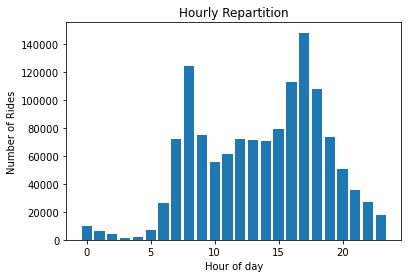

In [70]:
grouped_by_start_hour_graph = data_start_hours.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_by_start_hour_graph.index, grouped_by_start_hour_graph["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

# Test of different special days, like holidays
Open question that remains is the validity.
Also the number of rides varies quite a lot.

Holidays:
- New Year's Day: Jan 1
- Independence Day: July 4
- Labor Day: 1st Monday in September
- Thanksgiving Day: 4th Thursday in November
- Christmas Day: December 25


# //TODO: A graph with all Holidays in comparison will be added as well

# Holidays
## New Year's Day

In [71]:
data_new_year = data[data['start_time'].dt.date.astype(str) == '2017-01-01']
#data_new_year

Text(0.5, 1.0, 'Hourly Repartition')

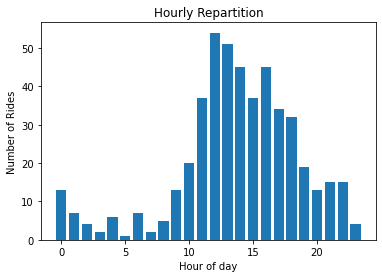

In [72]:
grouped_new_year = data_new_year.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_new_year.index, grouped_new_year["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

Memorial Day: 29th May

In [73]:
data_md = data[data['start_time'].dt.date.astype(str) == '2017-05-29']
#data_md

Text(0.5, 1.0, 'Hourly Repartition')

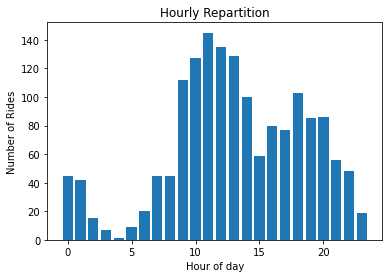

In [74]:
grouped_md = data_md.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_md.index, grouped_md["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

# Independence Day

In [75]:
data_4th = data[data['start_time'].dt.date.astype(str) == '2017-02-20']
#data_4th

Text(0.5, 1.0, 'Hourly Repartition')

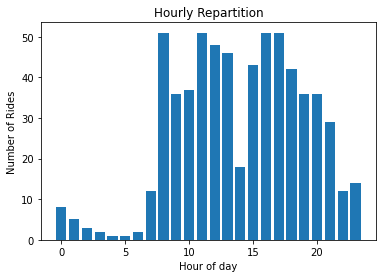

In [76]:
grouped_4th = data_4th.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_4th.index, grouped_4th["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

Labor Day: 4th Sep

In [77]:
data_ld = data[data['start_time'].dt.date.astype(str) == '2017-09-04']
#data_ld

Text(0.5, 1.0, 'Hourly Repartition')

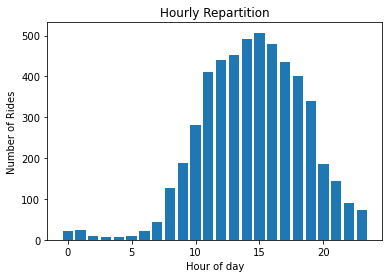

In [78]:
grouped_ld = data_ld.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_ld.index, grouped_ld["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

Thanksgiving Day: 23rd Nov

In [79]:
data_tg = data[data['start_time'].dt.date.astype(str) == '2017-12-25']
#data_tg

Text(0.5, 1.0, 'Hourly Repartition')

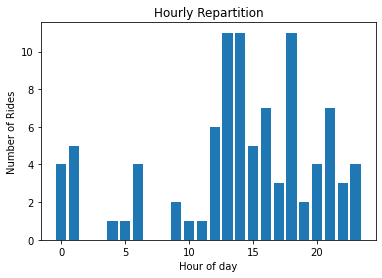

In [80]:
grouped_tg = data_tg.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_tg.index, grouped_tg["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

Christmas Day: 25th Dec

In [81]:
data_christmas = data[data['start_time'].dt.date.astype(str) == '2017-12-25']
data_christmas

,start_time,end_time,dayofweek_start,dayofweek_end,month_start,month_end,time_start,time_end,start_hour,duration,duration_minutes
1311617,2017-12-25 00:06:25,2017-12-25 00:12:58,Monday,Monday,Dec,Dec,00:06:25,00:12:58,0,0 days 00:06:33,6.550000
1311618,2017-12-25 00:10:08,2017-12-25 00:11:24,Monday,Monday,Dec,Dec,00:10:08,00:11:24,0,0 days 00:01:16,1.266667
1311619,2017-12-25 00:34:24,2017-12-25 00:42:24,Monday,Monday,Dec,Dec,00:34:24,00:42:24,0,0 days 00:08:00,8.000000
1311620,2017-12-25 00:55:57,2017-12-25 01:00:07,Monday,Monday,Dec,Dec,00:55:57,01:00:07,0,0 days 00:04:10,4.166667
1311621,2017-12-25 01:00:50,2017-12-25 01:07:06,Monday,Monday,Dec,Dec,01:00:50,01:07:06,1,0 days 00:06:16,6.266667
...,...,...,...,...,...,...,...,...,...,...,...
1311705,2017-12-25 22:34:50,2017-12-25 22:42:14,Monday,Monday,Dec,Dec,22:34:50,22:42:14,22,0 days 00:07:24,7.400000
1311706,2017-12-25 23:01:15,2017-12-25 23:10:43,Monday,Monday,Dec,Dec,23:01:15,23:10:43,23,0 days 00:09:28,9.466667
1311707,2017-12-25 23:04:25,2017-12-25 23:07:40,Monday,Monday,Dec,Dec,23:04:25,23:07:40,23,0 days 00:03:15,3.250000
1311708,2017-12-25 23:17:13,2017-12-25 23:25:02,Monday,Monday,Dec,Dec,23:17:13,23:25:02,23,0 days 00:07:49,7.816667


Text(0.5, 1.0, 'Hourly Repartition')

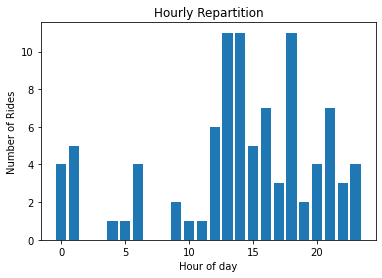

In [82]:
grouped_christmas = data_christmas.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_christmas.index, grouped_christmas["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

Super Ball: 2nd Feb (Check if a major sport event has an impact)

In [83]:
data_supberball = data[data['start_time'].dt.date.astype(str) == '2017-02-05']
#data_supberball

Text(0.5, 1.0, 'Hourly Repartition')

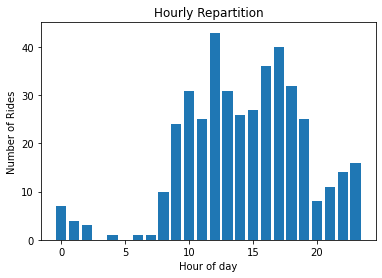

In [84]:
grouped_SuperBall = data_supberball.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_SuperBall.index, grouped_SuperBall["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

# Check for any other / normal day in a week

In [85]:
data_common = data[data['start_time'].dt.date.astype(str) == '2017-06-14']
data_common

,start_time,end_time,dayofweek_start,dayofweek_end,month_start,month_end,time_start,time_end,start_hour,duration,duration_minutes
358621,2017-06-14 00:00:33,2017-06-14 00:09:32,Wednesday,Wednesday,Jun,Jun,00:00:33,00:09:32,0,0 days 00:08:59,8.983333
358622,2017-06-14 00:00:40,2017-06-14 00:11:02,Wednesday,Wednesday,Jun,Jun,00:00:40,00:11:02,0,0 days 00:10:22,10.366667
358623,2017-06-14 00:01:20,2017-06-14 00:06:13,Wednesday,Wednesday,Jun,Jun,00:01:20,00:06:13,0,0 days 00:04:53,4.883333
358624,2017-06-14 00:08:48,2017-06-14 00:17:18,Wednesday,Wednesday,Jun,Jun,00:08:48,00:17:18,0,0 days 00:08:30,8.500000
358625,2017-06-14 00:09:21,2017-06-14 00:21:08,Wednesday,Wednesday,Jun,Jun,00:09:21,00:21:08,0,0 days 00:11:47,11.783333
...,...,...,...,...,...,...,...,...,...,...,...
365164,2017-06-14 23:52:59,2017-06-15 00:07:19,Wednesday,Thursday,Jun,Jun,23:52:59,00:07:19,23,0 days 00:14:20,14.333333
365165,2017-06-14 23:55:10,2017-06-15 00:03:03,Wednesday,Thursday,Jun,Jun,23:55:10,00:03:03,23,0 days 00:07:53,7.883333
365166,2017-06-14 23:55:16,2017-06-15 00:05:58,Wednesday,Thursday,Jun,Jun,23:55:16,00:05:58,23,0 days 00:10:42,10.700000
365167,2017-06-14 23:55:21,2017-06-15 00:06:09,Wednesday,Thursday,Jun,Jun,23:55:21,00:06:09,23,0 days 00:10:48,10.800000


Text(0.5, 1.0, 'Hourly Repartition')

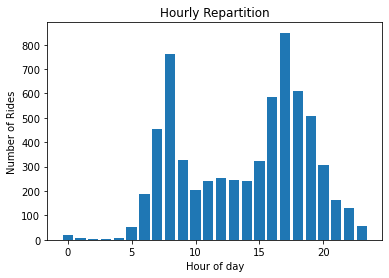

In [86]:
grouped_common = data_common.groupby("start_hour")['month_start'].describe()
plt.bar(grouped_common.index, grouped_common["count"])

f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of day")
plt.ylabel("Number of Rides")
plt.title("Hourly Repartition")

# Week

In [87]:
data.groupby("dayofweek_start").describe()

start_hour                                                    \
                     count       mean       std  min   25%   50%   75%   max   
dayofweek_start                                                                
Friday            196327.0  13.431647  4.785872  0.0   9.0  14.0  17.0  23.0   
Monday            189512.0  13.695782  4.785923  0.0   9.0  15.0  17.0  23.0   
Saturday          153558.0  14.260566  4.615695  0.0  11.0  14.0  17.0  23.0   
Sunday            151515.0  14.083061  4.567267  0.0  11.0  14.0  17.0  23.0   
Thursday          210985.0  13.627694  4.883792  0.0   9.0  15.0  17.0  23.0   
Tuesday           203212.0  13.628393  4.820685  0.0   9.0  15.0  17.0  23.0   
Wednesday         208648.0  13.624832  4.834593  0.0   9.0  15.0  17.0  23.0   

                duration                             ...                   \
                   count                       mean  ...              75%   
dayofweek_start                                      ...                    
Friday            196327  0 days 00:17:21.209507607  ...  0 days 00:17:01   
Monday            189512  0 days 00:17:29.975737684  ...  0 days 00:16:48   
Saturday          153558  0 days 00:27:34.142382682  ...  0 days 00:22:22   
Sunday            151515  0 days 00:24:57.472771672  ...  0 days 00:22:34   
Thursday          210985  0 days 00:16:02.816498803  ...  0 days 00:16:34   
Tuesday           203212  0 days 00:16:34.558948290  ...  0 days 00:16:36   
Wednesday         208648  0 days 00:16:05.366329895  ...  0 days 00:16:29   

                                  duration_minutes                         \
                              max            count       mean         std   
dayofweek_start                                                             
Friday           21 days 22:08:35         196327.0  17.353492  163.446995   
Monday           48 days 08:40:21         189512.0  17.499596  253.917263   
Saturday         34 days 01:02:48         153558.0  27.569040  313.933580   
Sunday           22 days 17:35:49         151515.0  24.957880  197.201024   
Thursday         34 days 10:43:17         210985.0  16.046942  200.935676   
Tuesday          33 days 00:13:20         203212.0  16.575982  197.459869   
Wednesday        28 days 03:46:11         208648.0  16.089439  186.340435   

                                                                         
                      min       25%        50%        75%           max  
dayofweek_start                                                          
Friday           1.016667  6.450000  10.550000  17.016667  31568.583333  
Monday           1.016667  6.316667  10.383333  16.800000  69640.350000  
Saturday         1.016667  7.500000  13.416667  22.366667  49022.800000  
Sunday           1.016667  7.383333  13.283333  22.566667  32735.816667  
Thursday         1.016667  6.383333  10.366667  16.566667  49603.283333  
Tuesday          1.016667  6.366667  10.333333  16.600000  47533.333333  
Wednesday        1.016667  6.400000  10.350000  16.483333  40546.183333  

[7 rows x 24 columns]

Text(0.5, 1.0, 'Rides per day of the week')

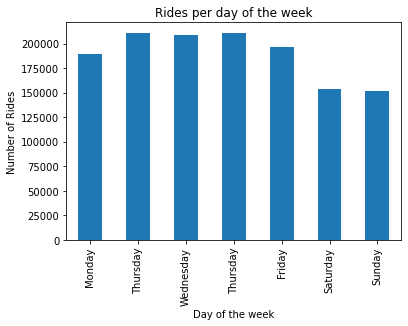

In [88]:
grouped_by_weekday = data.groupby("dayofweek_start")['duration'].describe()
ax = grouped_by_weekday["count"].loc[day_order].plot(kind="bar", legend=False)
plt.xlabel("Day of the week")
plt.ylabel("Number of Rides")
plt.title("Rides per day of the week")

# Montly Reparition

In [89]:
data.groupby("month_start").describe()

start_hour                                                    \
                 count       mean       std  min   25%   50%   75%   max   
month_start                                                                
Apr            99860.0  13.763259  4.680965  0.0  10.0  14.0  17.0  23.0   
Aug           190651.0  13.788084  4.777293  0.0  10.0  15.0  17.0  23.0   
Dec            55072.0  13.248293  4.833553  0.0   9.0  14.0  17.0  23.0   
Feb            17271.0  13.845406  4.691584  0.0  10.0  14.0  17.0  23.0   
Jan            19515.0  13.459185  4.731730  0.0   9.0  14.0  17.0  23.0   
Jul           175833.0  13.958785  4.835091  0.0  10.0  15.0  18.0  23.0   
Jun           161910.0  13.791205  4.805960  0.0   9.0  15.0  17.0  23.0   
Mar            31253.0  13.598503  4.738753  0.0   9.0  14.0  17.0  23.0   
May           127894.0  13.830586  4.757729  0.0  10.0  15.0  17.0  23.0   
Nov           105457.0  13.353215  4.809800  0.0   9.0  14.0  17.0  23.0   
Oct           163657.0  13.661585  4.749670  0.0   9.0  14.0  17.0  23.0   
Sep           165384.0  13.809788  4.744187  0.0  10.0  15.0  17.0  23.0   

            duration                             ...                   \
               count                       mean  ...              75%   
month_start                                      ...                    
Apr            99860  0 days 00:24:27.604626477  ...  0 days 00:19:10   
Aug           190651  0 days 00:18:42.644586181  ...  0 days 00:19:02   
Dec            55072  0 days 00:14:15.479063771  ...  0 days 00:14:26   
Feb            17271  0 days 00:11:21.410456835  ...  0 days 00:10:40   
Jan            19515  0 days 00:13:07.238431975  ...  0 days 00:11:35   
Jul           175833  0 days 00:21:42.852502090  ...  0 days 00:20:01   
Jun           161910  0 days 00:20:29.873491445  ...  0 days 00:19:04   
Mar            31253  0 days 00:15:50.992768694  ...  0 days 00:13:13   
May           127894  0 days 00:20:12.860556398  ...  0 days 00:17:51   
Nov           105457  0 days 00:14:09.106934579  ...  0 days 00:15:20   
Oct           163657  0 days 00:18:06.068319717  ...  0 days 00:17:23   
Sep           165384  0 days 00:17:42.937037440  ...  0 days 00:17:52   

                              duration_minutes                         \
                          max            count       mean         std   
month_start                                                             
Apr          48 days 08:40:21          99860.0  24.460077  428.839085   
Aug          22 days 00:31:38         190651.0  18.710743  138.097096   
Dec          33 days 00:13:20          55072.0  14.257984  245.378789   
Feb           1 days 23:40:10          17271.0  11.356841   44.634059   
Jan          11 days 03:10:14          19515.0  13.120641  131.459786   
Jul          30 days 05:19:54         175833.0  21.714208  221.067434   
Jun          24 days 19:31:05         161910.0  20.497892  182.667349   
Mar          13 days 22:06:23          31253.0  15.849879  197.110250   
May          34 days 10:43:17         127894.0  20.214343  268.792636   
Nov          16 days 17:47:43         105457.0  14.151782  104.857832   
Oct          28 days 03:46:11         163657.0  18.101139  209.615187   
Sep          21 days 22:08:35         165384.0  17.715617  149.558450   

                                                                     
                  min       25%        50%        75%           max  
month_start                                                          
Apr          1.016667  6.616667  11.350000  19.166667  69640.350000  
Aug          1.016667  7.200000  11.916667  19.033333  31711.633333  
Dec          1.016667  5.800000   9.083333  14.433333  47533.333333  
Feb          1.050000  4.883333   6.916667  10.666667   2860.166667  
Jan          1.016667  5.083333   7.250000  11.583333  16030.233333  
Jul          1.016667  7.366667  12.333333  20.016667  43519.900000  
Jun          1.016667  7.204167  11.883333  19.06

Text(0, 0.5, 'Number of Rides')

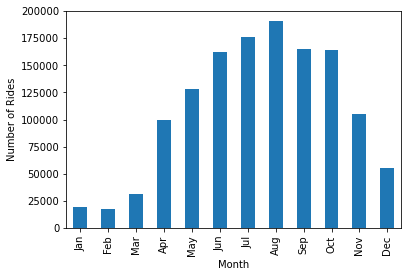

In [90]:
grouped_by_month = data.groupby("month_start")['dayofweek_start'].describe()
ax = grouped_by_month["count"].loc[month_order].plot(kind="bar", legend=False)
plt.xlabel("Month")
plt.ylabel("Number of Rides")